# k-fold Cross validation
In my usual work as a datascientist, one of the headache I have is deficiency of labeled data. In that case, effective method against it is *"cross validation" *. Actually there are several methods in cross-validation.
- *K-fold cross-validation*
- *Shuffle split cross-validation*
- *Leave one out cross-validation*  

Here I'm gonna handle "K-fold cross-validation".

## 0. What is *K-fold validation*
When performing *K-fold validation*, first of all, all labeled data is partitioned into *k* parts of equal size which is called *"fold"*. *k* is usually, specific number such as 5 or 10 and so on. Next, a sequence of model is trained. The first model is trained with first fold as test set, the remaining folds as train set. Then second model is built with secound fold as test set, the 1,3,4,5 folds as train sets. This precess is repeated using 3,4 and 5 fold as test set.

## 1. Benefit from k-fold validation
So far as I know, roughly speaking, there are three benefit obtained from *k-fold validation* instead of a single split into train and test data.　 
1. Each sample is supporsed to be in test set exactly onece, as each sample belongs to one of the folds, and each fold is the test set once. Therefore model is required to yild high cross validation score for all sample.  
2. Provides the information how sensitive our model is to the selection of the train and test set.  
3. We can use labeled data more effiectively than using single split of the data.  

However you must the following in mind, 
- *cross-validation* is not the way to build a model that can be applied to new data.  
- *cross-validation* increase computational cost.

## 2. K-fold validation in scikit-learn

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [4]:
cancer_dataset = load_breast_cancer()
cancer_data = cancer_dataset.data
cancer_target = cancer_dataset.target

In [29]:
# There are 569 samples
print('There are {} samples'.format(cancer_target.shape[0]))
print('There are {} datas of label "1"'.format(cancer_target.sum()))

There are 569 samples
There are 357 datas of label "1"


You can see "StratifiedKFold" offer dataset with same propotion as dataset.

In [31]:
# Tentatively k = 5.
cross_val = StratifiedKFold(n_splits=5)
for train,test in cross_val.split(cancer_data,cancer_target):
    print('Number of train data :',train.shape)
    print('Number of test data : ',test.shape)
    print('Number of 1 label in train data:', cancer_target[test].sum())

Number of train data : (454,)
Number of test data :  (115,)
Number of 1 label in train data: 72
Number of train data : (454,)
Number of test data :  (115,)
Number of 1 label in train data: 72
Number of train data : (456,)
Number of test data :  (113,)
Number of 1 label in train data: 71
Number of train data : (456,)
Number of test data :  (113,)
Number of 1 label in train data: 71
Number of train data : (456,)
Number of test data :  (113,)
Number of 1 label in train data: 71


Next, I'm gonna draw ROC curve of *cross-validation*

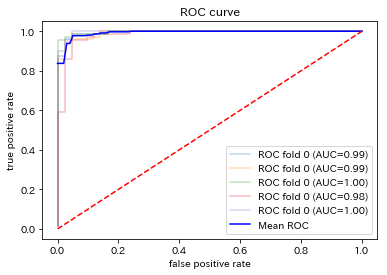

In [75]:
# Prepare model of logistic regression
logistic_model = LogisticRegression()

mean_fpr = np.linspace(0,1,100)
tprs = []
precisions = []
recalls = []
i=0

for train, test in cross_val.split(cancer_data,cancer_target):
    X_train = cancer_data[train]
    Y_train = cancer_target[train]
    X_test = cancer_data[test]
    Y_test = cancer_target[test]
    fitted_model = logistic_model.fit(X_train,Y_train)
    fpr,tpr,threshold = metrics.roc_curve(y_true=Y_test,y_score=fitted_model.predict_proba(X_test)[:,1])
    # So as to compute micro average of tpr,fpr, store them.
    tprs.append(np.interp(mean_fpr,fp=tpr,xp=fpr))
    
    roc_auc = metrics.auc(x=fpr,y=tpr)
    
    precisions.append(metrics.precision_score(y_true=Y_test,y_pred=fitted_model.predict(X_test)))
    recalls.append(metrics.recall_score(Y_test,fitted_model.predict(X_test)))
    plt.plot(fpr,tpr,alpha=0.3,label = 'ROC fold {} (AUC={:.2f})'.format(i,roc_auc))
    

# Compute 'micro' average of roc curve
micro_av_tprs = np.mean(tprs,axis=0)

plt.plot(mean_fpr,micro_av_tprs,label='Mean ROC',color='b')
plt.plot([0,1],[0,1],linestyle='--',color='r')
plt.legend(loc='lower right')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

In [82]:
df_pre_rec = pd.DataFrame([precisions,recalls]).T
df_pre_rec.columns = ['precision','recall']
df_pre_rec.head()

,precision,recall
0,0.910256,0.986111
1,0.933333,0.972222
2,0.972222,0.985915
3,0.957746,0.957746
4,0.985507,0.957746
